# **Ia. Pre-Processing (General): Loading and Preparing Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta   # !pip install pandas-ta
import yfinance as yf    # !pip install yfinance

import warnings
warnings.filterwarnings('ignore')

The most up-to-date list of companies in the Dow Jones Industrial Average (DJIA)
- 3M Company (MMM)
- American Express Company (AXP)
- Amgen Inc. (AMGN)
- Apple Inc. (AAPL)
- The Boeing Company (BA)
- Caterpillar Inc. (CAT)
- Chevron Corporation (CVX)
- Cisco Systems, Inc. (CSCO)
- The Coca-Cola Company (KO)
- The Walt Disney Company (DIS)
- Dow Inc. (DOW)
- Goldman Sachs Group, Inc. (GS)
- The Home Depot, Inc. (HD)
- Honeywell International Inc. (HON)
- IBM (International Business Machines Corporation) (IBM)
- Intel Corporation (INTC)
- Johnson & Johnson (JNJ)
- JPMorgan Chase & Co. (JPM)
- McDonald's Corporation (MCD)
- Merck & Co., Inc. (MRK)
- Microsoft Corporation (MSFT)
- Nike, Inc. (NKE)
- Pfizer Inc. (PFE)
- The Procter & Gamble Company (PG)
- The Travelers Companies, Inc. (TRV)
- UnitedHealth Group Incorporated (UNH)
- Verizon Communications Inc. (VZ)
- Visa Inc. (V)
- Walgreens Boots Alliance, Inc. (WBA)
- The Walt Disney Company (DIS)

## 1. Loading Data

In [2]:
listings = ['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIA']

In [3]:
df = yf.download(tickers=listings, period='10y', interval='1d', auto_adjust=False)

[*********************100%***********************]  31 of 31 completed


In [4]:
df.describe()

Adj Close                                                      \
              AAPL         AMGN          AXP           BA          CAT   
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     67.343717   165.603204   101.335253   199.190091   123.097178   
std      52.310326    50.123482    36.781959    87.635223    55.807034   
min      12.209950    73.348755    45.823318    82.948387    47.813438   
25%      25.792523   126.175108    71.969509   122.747564    73.294655   
50%      41.929575   157.386040    91.074879   174.349998   115.254383   
75%     121.075521   213.718590   122.742657   247.121056   168.343113   
max     187.000000   285.160828   194.931137   430.299957   263.111816   

                                                                        ...  \
               CRM         CSCO          CVX          DIA          DIS  ...   
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000  ...   
mean    131.867220    34.317407    95.389607   223.113731   110.390694  ...   
std      66.021326    12.220117    28.452781    72.772555    30.221883  ...   
min      36.950001    15.029692    46.736900   118.207504    55.172844  ...   
25%      72.792501    22.238687    77.833534   150.942280    93.172085  ...   
50%     129.930000    36.692179    87.995430   222.702034   103.155392  ...   
75%     176.029995    44.050134   100.371662   287.770355   124.977503  ...   
max     309.959991    61.063248   184.339294   357.163177   201.910004  ...   

             Volume                                                          \
                MRK          MSFT           NKE            PG           TRV   
count  2.518000e+03  2.518000e+03  2.518000e+03  2.518000e+03  2.518000e+03   
mean   1.106056e+07  3.129999e+07  7.688697e+06  8.352236e+06  1.634457e+06   
std    5.374055e+06  1.593358e+07  4.250148e+06  5.367993e+06  7.352432e+05   
min    2.343223e+06  7.425600e+06  1.821900e+06  2.022100e+06  3.054000e+05   
25%    7.929299e+06  2.221595e+07  5.294075e+06  6.013900e+06  1.147150e+06   
50%    9.939389e+06  2.761555e+07  6.697400e+06  7.261000e+06  1.455750e+06   
75%    1.271374e+07  3.546080e+07  8.645750e+06  9.248600e+06  1.907950e+06   
max    1.024973e+08  2.484285e+08  5.731940e+07  1.237357e+08  6.498300e+06   

                                                                             
                UNH             V            VZ           WBA           WMT  
count  2.518000e+03  2.518000e+03  2.518000e+03  2.518000e+03  2.518000e+03  
mean   3.687599e+06  9.010424e+06  1.706868e+07  5.986844e+06  8.080530e+06  
std    1.896926e+06  4.921256e+06  1.465757e+07  3.647695e+06  4.603387e+06  
min    7.140000e+05  1.993500e+06  4.108300e+06  1.367000e+06  2.094900e+06  
25%    2.608825e+06  6.197825e+06  1.175738e+07  3.975375e+06  5.634250e+06  
50%    3.233150e+06  7.921450e+06  1.496225e+07  5.202600e+06  6.910850e+06  
75%    4.238875e+06  1.045322e+07  1.943345e+07  6.968400e+06  9.133250e+06  
max    2.736140e+07  9.007360e+07  6.166205e+08  8.413010e+07  8.089810e+07  

[8 rows x 186 columns]

In [5]:
# stack and unstack indexed columns
df = df.stack(level=0).unstack(level=1)

# set each column name to TICKER - VALUE
df.columns = df.columns.map(lambda x: f'{x[0]} - {x[1]}')

# create date column from index
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})

In [6]:
d_df = df
for ticker in listings:
    col_name = f'{ticker} - Dividend'
    div_series = yf.Ticker(ticker).dividends
    series_df = div_series.to_frame(name=col_name)
    series_df.index = series_df.index.tz_convert(None).floor('D')
    d_df = pd.merge(d_df, series_df, left_on='Date', right_index=True, how='left')
    d_df[col_name] = d_df[col_name].fillna(0)

In [7]:
df.head()

,Date,AAPL - Adj Close,AAPL - Close,AAPL - High,AAPL - Low,AAPL - Open,AAPL - Volume,AMGN - Adj Close,AMGN - Close,AMGN - High,...,WBA - High,WBA - Low,WBA - Open,WBA - Volume,WMT - Adj Close,WMT - Close,WMT - High,WMT - Low,WMT - Open,WMT - Volume
0,2013-06-24,12.481573,14.376429,14.595000,14.216071,14.550000,480746000.0,73.601387,96.139999,97.230003,...,48.680000,47.509998,48.080002,6374400.0,59.696445,74.199997,74.790001,72.900002,73.050003,9697300.0
1,2013-06-25,12.484363,14.379643,14.563929,14.243929,14.489286,314162800.0,73.785133,96.379997,98.750000,...,45.580002,44.040001,45.169998,22560000.0,59.833199,74.370003,74.750000,73.839996,74.269997,7217800.0
2,2013-06-26,12.342970,14.216786,14.456786,14.130714,14.425000,367724000.0,76.250282,99.599998,100.169998,...,45.889999,44.959999,45.389999,12176700.0,60.348106,75.010002,75.180000,74.540001,74.620003,5478400.0
3,2013-06-27,12.209950,14.063571,14.335357,14.055000,14.258929,337246000.0,75.783257,98.989998,100.620003,...,45.169998,44.669998,45.150002,7470400.0,60.549263,75.260002,76.110001,75.239998,75.480003,7087800.0
4,2013-06-28,12.295223,14.161786,14.295357,13.888214,13.977143,578516400.0,75.530647,98.660004,99.879997,...,45.099998,44.130001,45.099998,15231500.0,59.929749,74.489998,75.660004,74.449997,75.110001,14548300.0


In [8]:
d_df.head()

,Date,AAPL - Adj Close,AAPL - Close,AAPL - High,AAPL - Low,AAPL - Open,AAPL - Volume,AMGN - Adj Close,AMGN - Close,AMGN - High,...,NKE - Dividend,PG - Dividend,CRM - Dividend,TRV - Dividend,UNH - Dividend,VZ - Dividend,V - Dividend,WBA - Dividend,WMT - Dividend,DIA - Dividend
0,2013-06-24,12.481573,14.376429,14.595000,14.216071,14.550000,480746000.0,73.601387,96.139999,97.230003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-06-25,12.484363,14.379643,14.563929,14.243929,14.489286,314162800.0,73.785133,96.379997,98.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-06-26,12.342970,14.216786,14.456786,14.130714,14.425000,367724000.0,76.250282,99.599998,100.169998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-06-27,12.209950,14.063571,14.335357,14.055000,14.258929,337246000.0,75.783257,98.989998,100.620003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-06-28,12.295223,14.161786,14.295357,13.888214,13.977143,578516400.0,75.530647,98.660004,99.879997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Check for missing or null data in a DataFrame¶

In [9]:
# "isna": - Stands for "is null" or "is NaN" (Not a Number).
#         - Is a fn used to identify missing or null values in a DataFrame or Series.
#         - Returns a boolean mask, which is a DataFrame or Series of the same shape as the input object, where each element is True if it is a missing or null value, 
#           and False otherwise.

nan_df = df.isna().sum(axis=0)          # print(nan_application_train)
numb_nan_df = (nan_df != 0).sum()
print('The Total Number of Variables with NAN contents is: ', numb_nan_df)

The Total Number of Variables with NAN contents is:  6


# **Ib. Pre-Processing (Prophet): Loading and Preparing Data**

## 1. Import Libraries

In [10]:
# Data Processing
import numpy as np
import pandas as pd

# Get time series data
import yfinance as yf

# Prophet model for time series forecast
from prophet import Prophet

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

## 2. Load Data (DJIA, MCD, VTI)

Loading stock data from Yahoo Finance API.
- We pull 10 years of daily data from June 2013 to June 2023.
- `start_date` = 2013-06-17
- `end_date`   = 2023-06-17 (`yfinance` excludes the end date, so we need to add 1 day to the last day of the data end date).
- `train_end_date` = 2021-06-16 (June 16th 2021 is the 'cutoff date', i.e. the splitting date for the training and testing dataset).

In [11]:
# Data start-date
start_date = '2013-06-17'

# Data end-date (yfinance excludes the end-date, so we need to add 1 day to the last day of data)
end_date = '2023-06-17'

# Cutoff-date (for splitting training and testing dataset)
train_end_date = '2021-06-16'

In [12]:
# Download Close data from Yahoo Finance for the list of tickers
ticker_list = ['MCD', '^DJI', 'VTI']
data = yf.download(ticker_list, start=start_date, end=end_date)[['Close','Volume']]

# Extract the full names of the columns
full_names = [' '.join(col).strip() for col in data.columns]
data.columns = full_names

# Take a look at the data
data.head()

[*********************100%***********************]  3 of 3 completed


,Close MCD,Close VTI,Close ^DJI,Volume MCD,Volume VTI,Volume ^DJI
Date,,,,,,
2013-06-17,98.739998,84.690002,15179.849609,4884800,2416900,139250000
2013-06-18,99.750000,85.330002,15318.230469,3340100,2095100,99210000
2013-06-19,98.809998,84.239998,15112.190430,3518200,4448100,111380000
2013-06-20,96.790001,82.150002,14758.320312,5550100,4933200,172630000
2013-06-21,97.230003,82.360001,14799.400391,7227000,4227700,420080000


In [13]:
# Check if any missing or NaN values exist in the DataFrame
any_missing = data.isnull().values.any()  # or df.isna().values.any()
missing_count = any_missing.sum()
print('missing_count:', missing_count)
# Backward fill missing values (use the next value)
data = data.fillna(method='bfill')

missing_count: 0


In [14]:
# Info on the df
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2013-06-17 to 2023-06-16
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close MCD    2519 non-null   float64
 1   Close VTI    2519 non-null   float64
 2   Close ^DJI   2519 non-null   float64
 3   Volume MCD   2519 non-null   int64  
 4   Volume VTI   2519 non-null   int64  
 5   Volume ^DJI  2519 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 137.8 KB


Note:
- The dataset has 2518 records.
- There are no missing values.

## 3. Time Series Features

In [15]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

In [16]:
X, y = create_features(data, label='Close MCD')
features_and_target = pd.concat([X, y], axis=1)

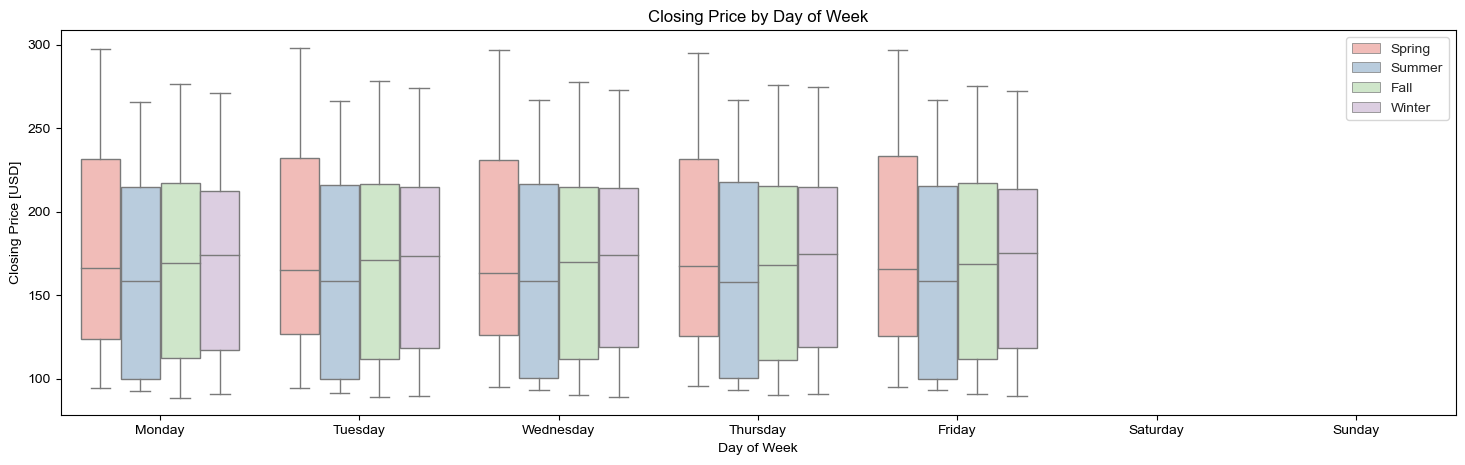

In [17]:
# BOXPLOTs will help visualize how some of these features relate to each other
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='Close MCD',
            hue='season',
            ax=ax,
            linewidth=1,
            palette="Pastel1")
# Remove the background color
sns.set_style("whitegrid")  # Set the style to "whitegrid" or "white"
ax.set_title('Closing Price by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Closing Price [USD]')
ax.legend(bbox_to_anchor=(1, 1))
plt.gca().patch.set_facecolor('none')  # Set the facecolor of the plot area to transparent
plt.show()

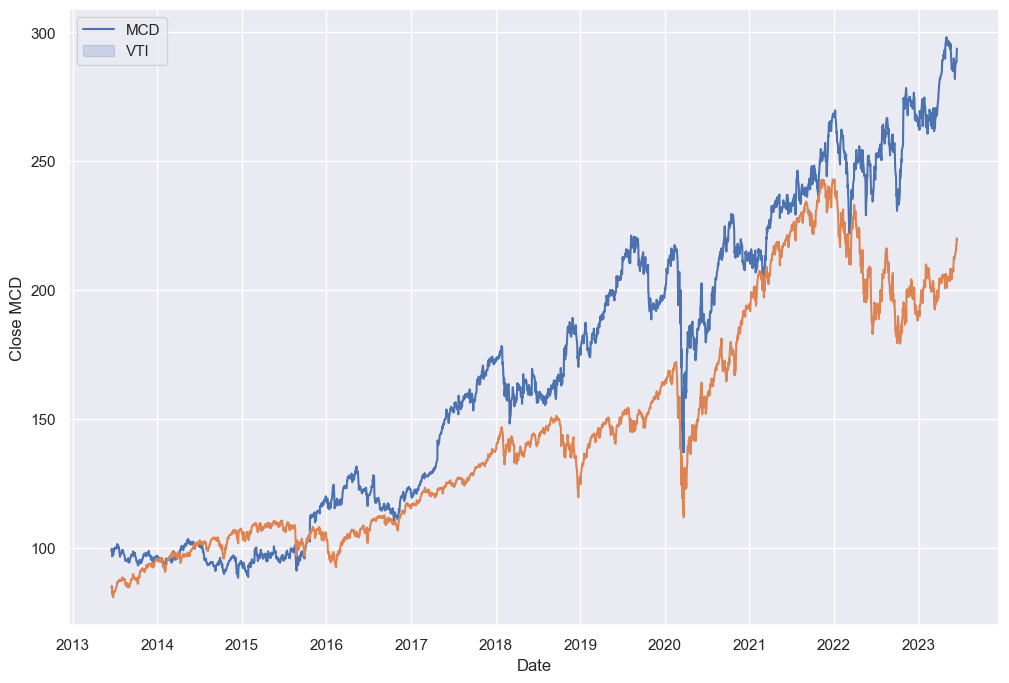

In [18]:
# Visualizing data using seaborn
sns.set(rc={'figure.figsize': (12,8)})
sns.lineplot(x=data.index, y=data['Close MCD'])
sns.lineplot(x=data.index, y=data['Close VTI'])
plt.legend(['MCD','VTI']);
# plt.gca().patch.set_facecolor('none')  # Set the facecolor of the plot area to transparent

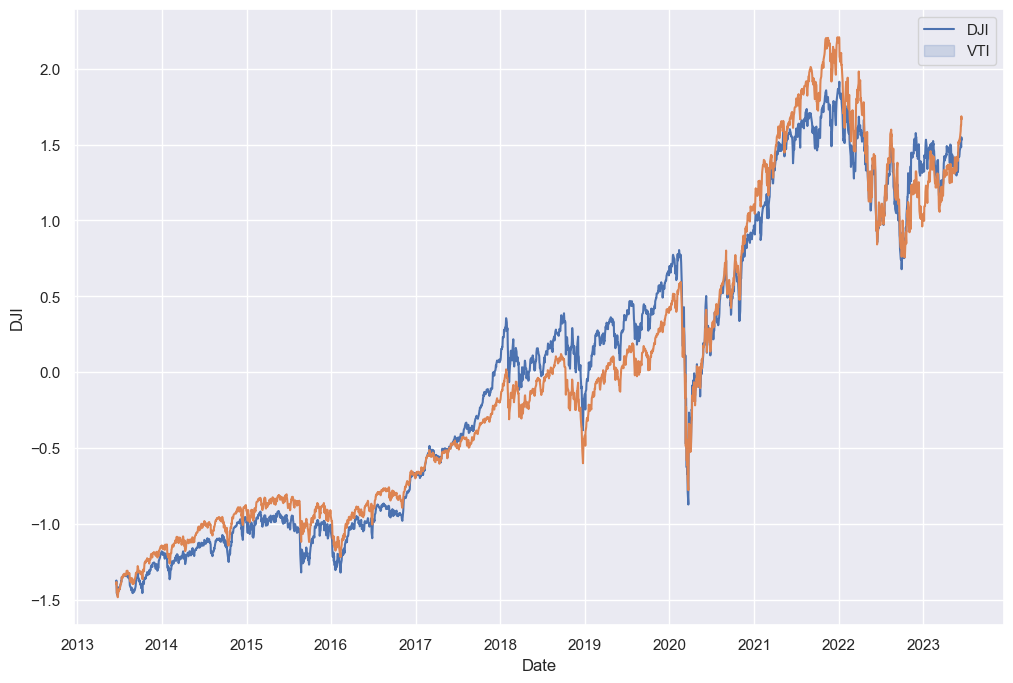

In [19]:
# Normalizing the data of 2 columns
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
datan  = pd.DataFrame(index=data.index)

# Normalize the column using z-score normalization
datan['DJI'] = scaler.fit_transform(data[['Close ^DJI']])
datan['VTI'] = scaler.fit_transform(data[['Close VTI']])

# Visualizing 'normalized data' using seaborn
sns.set(rc={'figure.figsize': (12,8)})
sns.lineplot(x=data.index, y=datan['DJI'])
sns.lineplot(x=data.index, y=datan['VTI'])
plt.legend(['DJI','VTI']);

## 4. Indicators: RSI, EMA, VWAP

In [20]:
ind_df = data.copy()
ind_df.reset_index(inplace=True)
ind_df.head()

,Date,Close MCD,Close VTI,Close ^DJI,Volume MCD,Volume VTI,Volume ^DJI
0,2013-06-17,98.739998,84.690002,15179.849609,4884800,2416900,139250000
1,2013-06-18,99.750000,85.330002,15318.230469,3340100,2095100,99210000
2,2013-06-19,98.809998,84.239998,15112.190430,3518200,4448100,111380000
3,2013-06-20,96.790001,82.150002,14758.320312,5550100,4933200,172630000
4,2013-06-21,97.230003,82.360001,14799.400391,7227000,4227700,420080000


In [21]:
# Calculate RSI: Relative Strength Index
def calculate_rsi(df_s, window=14):
    delta = df_s.diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    average_gain = up.rolling(window).mean()
    average_loss = down.rolling(window).mean()
    relative_strength = average_gain / average_loss
    rsi = 100 - (100 / (1 + relative_strength))
    return rsi

ind_df['RSI DJI'] = calculate_rsi(ind_df['Close ^DJI'])
ind_df['RSI MCD'] = calculate_rsi(ind_df['Close MCD'])

In [22]:
# Calculate EMA: Exponential Moving Average
def calculate_ema(df_s, window=20):
    ema = df_s.ewm(span=window, adjust=False).mean()
    return ema

ind_df['EMA DJI'] = calculate_ema(ind_df['Close ^DJI'])
ind_df['EMA MCD'] = calculate_ema(ind_df['Close MCD'])

In [23]:
# Calculate VWAP: Volume Weighted Average Price
def calculate_vwap(df_sC,df_sV):
    tp = (df_sC + df_sC.shift()) / 2
    vwap = (tp * df_sV).cumsum() / df_sV.cumsum()
    return vwap

ind_df['VWAP DJI'] = calculate_vwap(ind_df['Close ^DJI'],ind_df['Volume ^DJI'])
ind_df['VWAP MCD'] = calculate_vwap(ind_df['Close MCD'],ind_df['Volume MCD'])

In [24]:
ind_fill_df = ind_df.fillna(method = 'bfill')
ind_fill_df

,Date,Close MCD,Close VTI,Close ^DJI,Volume MCD,Volume VTI,Volume ^DJI,RSI DJI,RSI MCD,EMA DJI,EMA MCD,VWAP DJI,VWAP MCD
0,2013-06-17,98.739998,84.690002,15179.849609,4884800,2416900,139250000,48.682637,56.008599,15179.849609,98.739998,6344.281063,40.303009
1,2013-06-18,99.750000,85.330002,15318.230469,3340100,2095100,99210000,48.682637,56.008599,15193.028739,98.836189,6344.281063,40.303009
2,2013-06-19,98.809998,84.239998,15112.190430,3518200,4448100,111380000,48.682637,56.008599,15185.329852,98.833694,9168.555346,57.972351
3,2013-06-20,96.790001,82.150002,14758.320312,5550100,4933200,172630000,48.682637,56.008599,15144.662277,98.639057,11073.938287,70.754683
4,2013-06-21,97.230003,82.360001,14799.400391,7227000,4227700,420080000,48.682637,56.008599,15111.780193,98.504861,12725.164918,78.493086
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,2023-06-12,288.570007,215.850006,34066.328125,1885000,2479900,308130000,65.032480,48.448693,33500.022067,288.051442,26559.194206,153.162312
2515,2023-06-13,288.549988,217.440002,34212.121094,2027800,4295700,308790000,73.055851,54.914309,33567.841022,288.098923,26562.779406,153.188495
2516,2023-06-14,288.440002,217.440002,33979.328125,1964500,4131000,354910000,73.725921,55.769190,33607.030270,288.131406,26566.872259,153.213839
2517,2023-06-15,292.609985,220.089996,34408.058594,2619200,2895100,361400000,78.541903,63.842233,33683.318682,288.557938,26571.089561,153.248121


## 5. Data Processing

Transform the dataset into a time-series modleing dataset:
- Prophet requires at least 2 columns as inputs (**`ds`** column and **`y`** column)
- **`ds`** has the time info: Currently, we have the `Date` as the `Index`, so we reset the *Index* and rename `Date` to `ds`.
- **`y`** has the time-series values: In this example, b/c we are predicting the DJIA and MCD closing prices, the column name `Close DJI` and `Close MCD` are changed to `y`.
- There is no pre-defined name for the additional predictor in Prophet, so we can keep the name `Close VTI`, `RSI DJI`, `EMA DJI`, `VWAP DJI` as they are.

In [25]:
dataDJI  = ind_fill_df[ ['Date','Close ^DJI','Close VTI','RSI DJI','EMA DJI','VWAP DJI'] ].copy()
dataMCD = ind_fill_df[ ['Date','Close MCD','Close VTI','RSI MCD','EMA MCD','VWAP MCD'] ].copy()

In [26]:
# Change variable names for DJI df
dataDJI.rename(columns={'Date': 'ds', 'Close ^DJI': 'y'}, inplace=True)

# Change variable names for MCD df
dataMCD.rename(columns={'Date': 'ds', 'Close MCD': 'y'}, inplace=True)

# Take a look at the data
# dataMCD_P.tail()

Next, let's check the correlation between the DJIA and MCD stock closing prices and the indicators (VTI closing price, RSI, EMA, VWAP).

**Note:**
- VTI refers to the Vanguard Total Stock Market ETF (an Exchange-Traded Fund offered by the Vanguard Group).
- It aims to track the performance of the CRSP US Total Market Index, which represents the broad U.S. equity market.
- VTI provides investors with exposure to a diversified portfolio of stocks across various sectors and market capitalizations.

In [27]:
# Check CORRELATION among DJIA indicators
dataDJI.iloc[:, 1:].corrwith(dataDJI['y'])

y            1.000000
Close VTI    0.986052
RSI DJI      0.002998
EMA DJI      0.996633
VWAP DJI     0.961518
dtype: float64

In [28]:
# Check CORRELATION among MCD indicators
dataMCD.iloc[:, 1:].corrwith(dataMCD['y'])

y            1.000000
Close VTI    0.938849
RSI MCD      0.065298
EMA MCD      0.997365
VWAP MCD     0.973342
dtype: float64

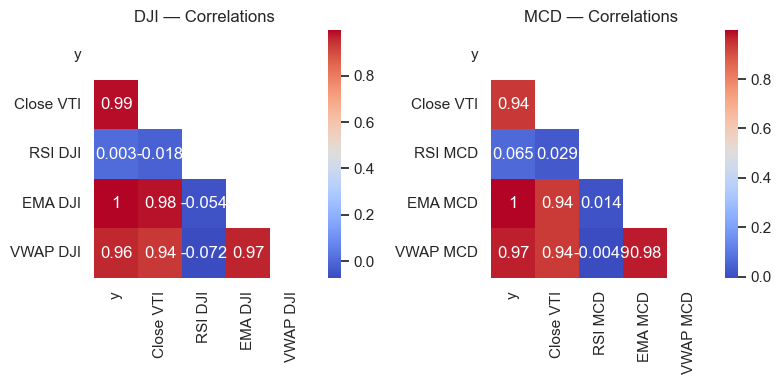

In [29]:
# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figure size as needed

# Create a correlation matrix of the DataFrame
correlation_matrix1 = dataDJI.iloc[:, 1:].corr()
correlation_matrix2 = dataMCD.iloc[:, 1:].corr()

# Create a mask for the upper-triangular portion
mask1 = np.triu(np.ones_like(correlation_matrix1, dtype=bool))
mask2 = np.triu(np.ones_like(correlation_matrix2, dtype=bool))

# Plot the heatmap
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', mask=mask1, ax=axes[0])
axes[0].set_title('DJI — Correlations')
axes[0].set_facecolor('none')

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', mask=mask2, ax=axes[1])
axes[1].set_title('MCD — Correlations')
axes[1].set_facecolor('none')

# Adjust the layout and display the figure
plt.tight_layout()

plt.show()

Note:
- Values close to 1.0 indicate that there is a high-correlation between the two features.
- While VTI closing price and EMA and VWAP are potentially good predictors for both the DJI and MCD closing prices, the RSI is not (so we will discard it).

## 5. Train/Test Split

- A training and a testing dataset are created.
- We can't use random split for time-series data, b/c it causes data leakage from the future dates to the past dates.
- Usually, a cutoff date is selected: The data before the cutoff date is the training dataset, and the data after the cutoff date is used as the testing dataset.

### 5.1 Train/Test Split — DJI Index

In [30]:
# Train/Test split
train_DJI = dataDJI[dataDJI['ds'] <= train_end_date]
test_DJI  = dataDJI[dataDJI['ds'] >  train_end_date]

In [31]:
# Check the start and end time of the training and testing datasets.
print('The training dataset has', len(train_DJI), 'records, ranging from', train_DJI['ds'].min(), 'to', train_DJI['ds'].max() )
print('The testing dataset has', len(test_DJI), 'records, ranging from', test_DJI['ds'].min(), 'to', test_DJI['ds'].max() )

The training dataset has 2015 records, ranging from 2013-06-17 00:00:00 to 2021-06-16 00:00:00
The testing dataset has 504 records, ranging from 2021-06-17 00:00:00 to 2023-06-16 00:00:00


### 5.2 Train/Test Split — MCD Index

In [32]:
# Train/Test split
train_MCD = dataMCD[dataMCD['ds'] <= train_end_date]
test_MCD  = dataMCD[dataMCD['ds'] >  train_end_date]

In [33]:
# Check the start and end time of the training and testing datasets.
print('The training dataset has', len(train_MCD), 'records, ranging from', train_MCD['ds'].min(), 'to', train_MCD['ds'].max() )
print('The testing dataset has', len(test_MCD), 'records, ranging from', test_MCD['ds'].min(), 'to', test_MCD['ds'].max() )

The training dataset has 2015 records, ranging from 2013-06-17 00:00:00 to 2021-06-16 00:00:00
The testing dataset has 504 records, ranging from 2021-06-17 00:00:00 to 2023-06-16 00:00:00


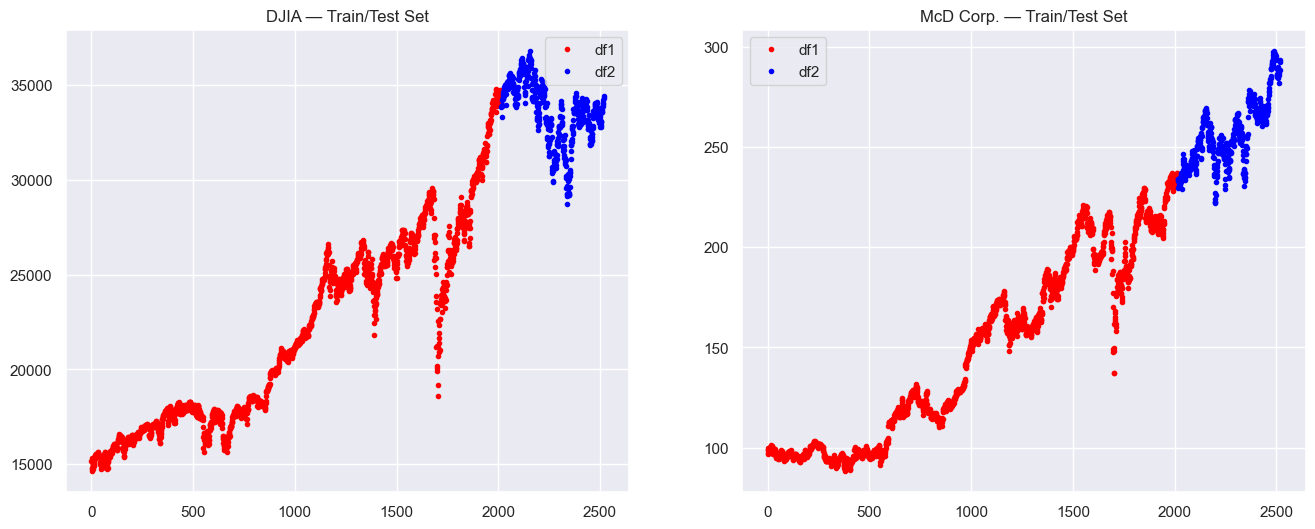

In [34]:
# Plot train and test so you can see where we have split

# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8*2, 6))

axs[0].plot(train_DJI.index, train_DJI['y'], color='red', label='df1', marker='.', linestyle='')
axs[0].plot(test_DJI.index, test_DJI['y'], color='blue', label='df2', marker='.', linestyle='')
axs[0].set_title('DJIA — Train/Test Set')

axs[1].plot(train_MCD.index, train_MCD['y'], color='red', label='df1', marker='.', linestyle='')
axs[1].plot(test_MCD.index, test_MCD['y'], color='blue', label='df2', marker='.', linestyle='')
axs[1].set_title('McD Corp. — Train/Test Set')

# Adding a legend
axs[0].legend()
axs[1].legend()

# Display the plot
plt.show()

**Note:**  
In this tutorial, `train_end_date` was set before: There are 494 data points in the training dataset and 11 data points in the testing dataset.

# **II. Analyses & Post-Processing**

## 1. BASELINE Model

We now build a Univariate Baseline model using the default Prophet hyper-parameters, and fit the model using the training dataset.

### 1.1: Fitting (Baseline Model)

In [35]:
def fit_and_predict_prophet(train, periods):

    # Fit Prophet model and make predictions for each training DataFrame
    model = Prophet()
    model.fit(train)

    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    return model, forecast

In [36]:
# Call the function to get the models and forecasts
periods = 16
model_baseline_1, forecast_baseline_1 = fit_and_predict_prophet(train_DJI, periods)
model_baseline_2, forecast_baseline_2 = fit_and_predict_prophet(train_MCD, periods)

01:35:05 - cmdstanpy - INFO - Chain [1] start processing
01:35:05 - cmdstanpy - INFO - Chain [1] done processing
01:35:06 - cmdstanpy - INFO - Chain [1] start processing
01:35:06 - cmdstanpy - INFO - Chain [1] done processing


**Notes:**
- Prophet automatically fits daily, weekly, and yearly seasonalities if the time-series is more than 2 cycles long.
- The model info shows that the yearly seasonality and the daily seasonality are disabled.
- The daily seasonality is disabled b/c we don't have sub-daily time-series.
- The yearly seasonality is disabled, although we have 10 years of data b/c the are no stock pirce data on holidays and weeknds, so we have less than 365 data-pts per each year.
- We will continue with the default values for the Baseline Model and force the yearly seasonality in the next model to see the impact of the yearly seasonality.

### 1.2: Forecasting (Baseline Model)

To make a forecast, we first need to create a 'future df': 
- `periods` = 7 means that we would like to make predictions for the next 7 days.

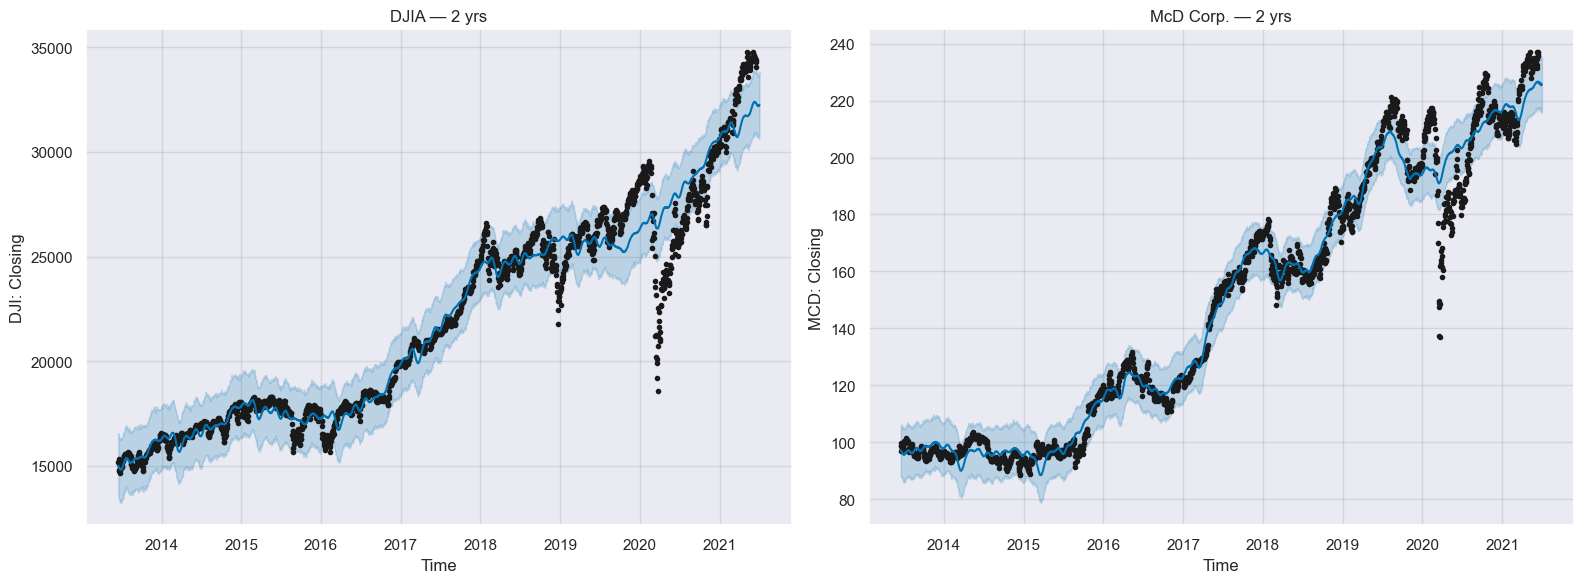

In [37]:
# Plot the predictions
fig, axes = plt.subplots(1, 2, figsize=(8*2, 6))  # Adjust the figure size as needed

# Plot the prediction for each DataFrame
model_baseline_1.plot(forecast_baseline_1, ax=axes[0])
axes[0].set_ylabel('DJI: Closing')
axes[0].set_xlabel('Time')
axes[0].set_title('DJIA — 2 yrs');

model_baseline_2.plot(forecast_baseline_2, ax=axes[1])
axes[1].set_ylabel('MCD: Closing')
axes[1].set_title('McD Corp. — 2 yrs');
axes[1].set_xlabel('Time')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

After making the prediction on the future df, we can plot the results using `.plot`:
- **Black dots**: are the actual values.
- **Blue line**: is the PREDICTION.
- **Blue shade**: shows the uncertainty interval. (Default value for uncertainty is 80%, used here!)

The *uncertainty interval* is calcualted based on the assumption that the average frequency and magnitude of trend changes in the future will be the same as the historical data. The historical data trend changes are projected forward to get the uncertainty intervals.

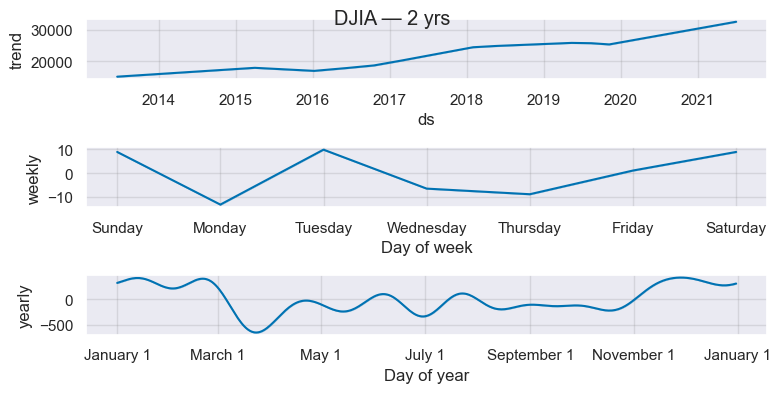

In [38]:
# Visualize the forecast components
fig = model_baseline_1.plot_components(forecast_baseline_1, figsize=(8, 4));
plt.suptitle('DJIA — 2 yrs');

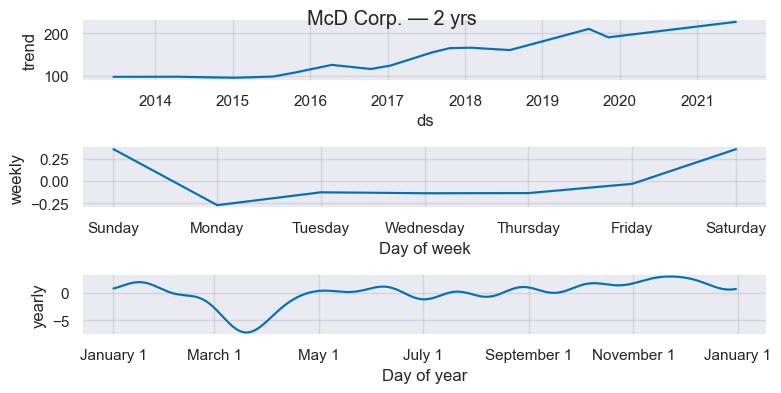

In [39]:
# Visualize the forecast components
fig = model_baseline_2.plot_components(forecast_baseline_2, figsize=(8, 4));
plt.suptitle('McD Corp. — 2 yrs');

**Obs:**
In addition to the forecast plot, Prohpet also provides the *components plot*.
- From the *components plot* chart, we can see that the DJIA stock closing price has an overall upward trend.
- The weekly seasonality shows that the price tends to be lower at the beginning of the week and slightly higher at the end of the week.

### 1.3: PERFORMANCE (Baseline Model)

The forecast df did not include the actual values, so we need to merge the forecast df with the test dataframe to compare the actual values with the predicted values.

In [40]:
# Merge actual and predicted values
performance_baseline_1 = pd.merge(test_DJI, forecast_baseline_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-periods:],on='ds')

# check MAE value
performance_baseline_1_MAE = mean_absolute_error(performance_baseline_1['y'], performance_baseline_1['yhat'])
print(f'The MAE for the DJIA baseline model is USD {round(performance_baseline_1_MAE)}')

# Check MAPE value
performance_baseline_1_MAPE = mean_absolute_percentage_error(performance_baseline_1['y'], performance_baseline_1['yhat'])
print(f'The MAPE for the DJIA baseline model is {round(performance_baseline_1_MAPE,3)}')

The MAE for the DJIA baseline model is USD 1929
The MAPE for the DJIA baseline model is 0.056


**Obs: DJIA**
- The MAE (Mean Abs Error) for the BASELINE model is USD 1,929, meaning that on avg, the forecast is off by USD 1,929. Given the DJIA price of nearly USD 35,000, the prediction is not bad.
- The MAPE (Mean Abs Percent Error) for the BASELINE model is 5.6%, meaning that on avg, the forecast is off by 5.6% of the stock price.

In [41]:
# Merge actual and predicted values
performance_baseline_2 = pd.merge(test_MCD, forecast_baseline_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-periods:],on='ds')

# check MAE value
performance_baseline_2_MAE = mean_absolute_error(performance_baseline_2['y'], performance_baseline_2['yhat'])
print(f'The MAE for the MCD baseline model is USD {round(performance_baseline_2_MAE)}')

# Check MAPE value
performance_baseline_2_MAPE = mean_absolute_percentage_error(performance_baseline_2['y'], performance_baseline_2['yhat'])
print(f'The MAPE for the MCD baseline model is {round(performance_baseline_2_MAPE,3)}')

The MAE for the MCD baseline model is USD 7
The MAPE for the MCD baseline model is 0.028


**Obs: MCD**
- The MAE (Mean Abs Error) for the BASELINE model is USD 7, meaning that on avg, the forecast is off by USD 7. Given the MCD price of nearly USD 290, the prediction is not bad.
- The MAPE (Mean Abs Percent Error) for the BASELINE model is 2.8%, meaning that on avg, the forecast is off by 2.8% of the stock price.

## 2. BETTER Model: Baseline Model + Seasonality

The baseline model already gives us good estimations:
- Can we tune the model to make the estimations better?
- Now, we will force the model to account for the yearly seasonality.

### 2.1: Fitting (Better Model)

In [42]:
def fit_and_predict_prophet_season(train, periods):

    # Fit Prophet model and make predictions for each training DataFrame
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
    model.fit(train)

    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    return model, forecast

In [43]:
# Call the function to get the models and forecasts
# periods = 16
model_season_1, forecast_season_1 = fit_and_predict_prophet_season(train_DJI, periods)
model_season_2, forecast_season_2 = fit_and_predict_prophet_season(train_MCD, periods)

01:35:10 - cmdstanpy - INFO - Chain [1] start processing
01:35:11 - cmdstanpy - INFO - Chain [1] done processing
01:35:11 - cmdstanpy - INFO - Chain [1] start processing
01:35:12 - cmdstanpy - INFO - Chain [1] done processing


### 2.2: Forecasting (Better Model)

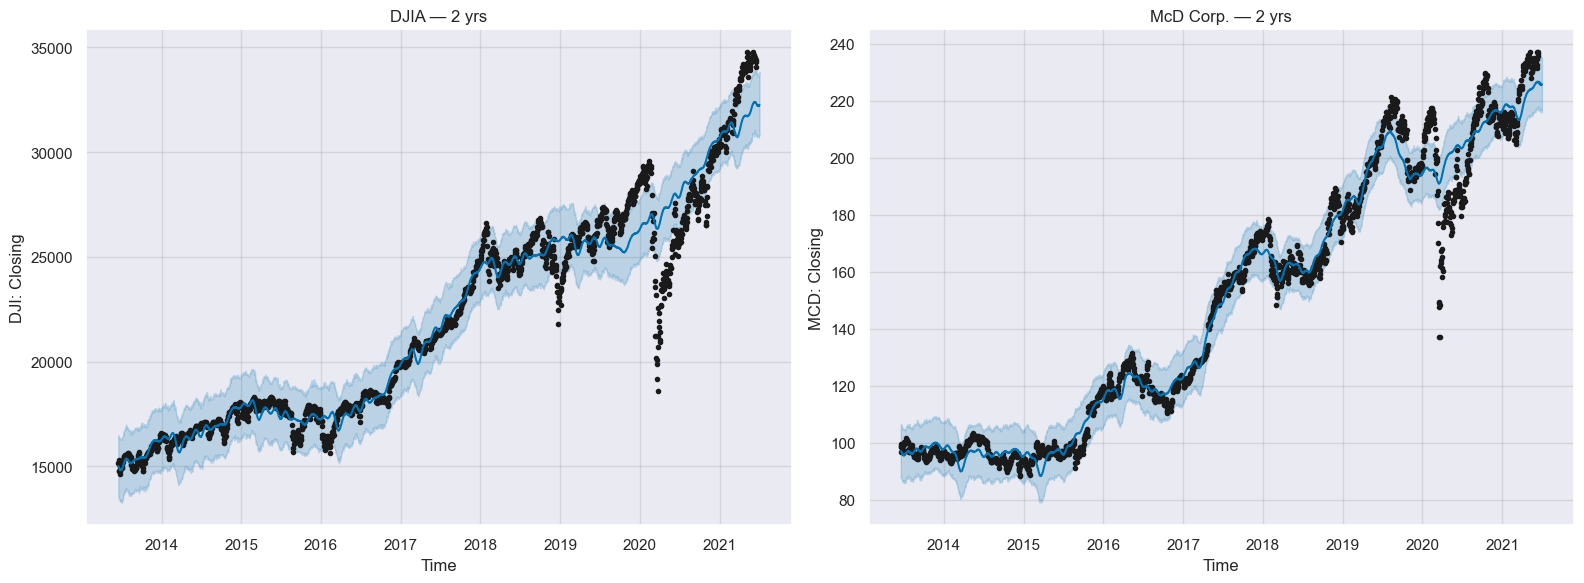

In [44]:
# Plot the predictions
fig, axes = plt.subplots(1, 2, figsize=(8*2, 6))  # Adjust the figure size as needed

# Plot the prediction for each DataFrame
model_season_1.plot(forecast_season_1, ax=axes[0])
axes[0].set_ylabel('DJI: Closing')
axes[0].set_xlabel('Time')
axes[0].set_title('DJIA — 2 yrs');



model_season_2.plot(forecast_season_2, ax=axes[1])
axes[1].set_ylabel('MCD: Closing')
axes[1].set_title('McD Corp. — 2 yrs');
axes[1].set_xlabel('Time')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

**Obs:**
- The forecast plot is much better than the baseline model.
- The predictions are more aligned with the actual values, and the uncertainty interval is narrower.

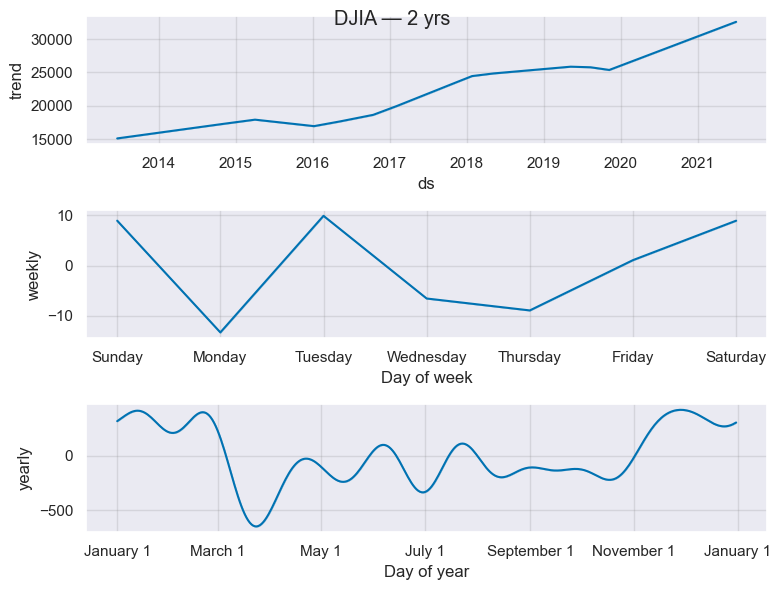

In [45]:
# Visualize the forecast components
fig = model_season_1.plot_components(forecast_season_1, figsize=(8, 6));
plt.suptitle('DJIA — 2 yrs');

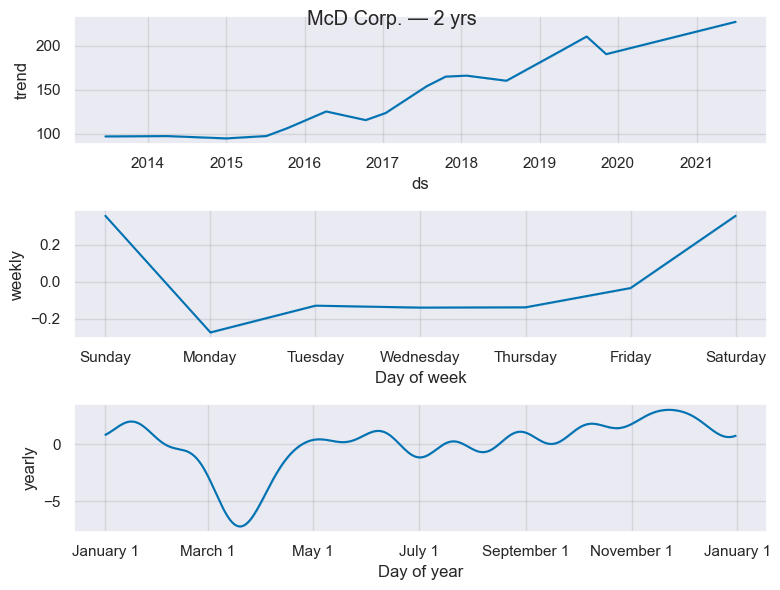

In [46]:
# Visualize the forecast components
fig = model_season_2.plot_components(forecast_season_2, figsize=(8, 6));
plt.suptitle('McD Corp. — 2 yrs');

**Obs:**
- For the components plot, besides trend and weekly seasonality, there is a yearly seasonality chart, showing the seasonality over the year.

### 2.3: PERFORMANCE (Better Model with Seasonality)

In [47]:
# Merge actual and predicted values
performance_season_1 = pd.merge(test_DJI, forecast_season_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-periods:],on='ds')

# check MAE value
performance_season_1_MAE = mean_absolute_error(performance_season_1['y'], performance_season_1['yhat'])
print(f'The MAE for the DJIA seasonality model is USD {round(performance_season_1_MAE)}')

# Check MAPE value
performance_season_1_MAPE = mean_absolute_percentage_error(performance_season_1['y'], performance_season_1['yhat'])
print(f'The MAPE for the DJIA seasonality model is {round(performance_season_1_MAPE,3)}')

The MAE for the DJIA seasonality model is USD 1929
The MAPE for the DJIA seasonality model is 0.056


**Obs: DJIA**
- The MAE (Mean Abs Error) for the seasonality model is USD 1,929, meaning that on avg, the forecast is off by USD 1,929. Given the DJIA price of nearly USD 35,000, the prediction is not bad.
- The MAPE (Mean Abs Percent Error) for the seasonality model is 5.6%, meaning that on avg, the forecast is off by 5.6% of the stock price.

In [48]:
# Merge actual and predicted values
performance_season_2 = pd.merge(test_MCD, forecast_season_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-periods:],on='ds')

# check MAE value
performance_season_2_MAE = mean_absolute_error(performance_season_2['y'], performance_season_2['yhat'])
print(f'The MAE for the MCD seasonality model is USD {round(performance_season_2_MAE)}')

# Check MAPE value
performance_season_2_MAPE = mean_absolute_percentage_error(performance_season_2['y'], performance_season_2['yhat'])
print(f'The MAPE for the MCD seasonality model is {round(performance_season_2_MAPE,3)}')

The MAE for the MCD seasonality model is USD 7
The MAPE for the MCD seasonality model is 0.028


**Obs: MCD** The model performance is slightly worse than the baseline model  
- The MAE (Mean Abs Error) for the seasonality model is USD 7, meaning that on avg, the forecast is off by USD 7. Given the MCD price of nearly USD 290, the prediction is not bad.
- The MAPE (Mean Abs Percent Error) for the seasonality model is 2.8%, meaning that on avg, the forecast is off by 2.8% of the stock price.

## 3. Multivariate Model

Here, we add the VTI price as an additional predictor, using the `add_regressor` function.
- Multiple features need to be created and evaluated as feature engineering and feature selection steps for the model.
- VTI, EMA, and VWAP are accounted for. 
- `standardize` = `False` means that regressor will not be standardized.

### 3.1 Fitting (Multivariate Model)

In [49]:
test_DJI

,ds,y,Close VTI,RSI DJI,EMA DJI,VWAP DJI
2015,2021-06-17,33823.449219,219.470001,26.008577,34316.715478,24064.390361
2016,2021-06-18,33290.078125,216.750000,15.665642,34218.940492,24075.507008
2017,2021-06-21,33876.968750,219.740005,35.115653,34186.371755,24081.767388
2018,2021-06-22,33945.578125,220.990005,36.297947,34163.439028,24087.560184
2019,2021-06-23,33874.238281,220.899994,35.583135,34135.896100,24092.758248
...,...,...,...,...,...,...
2514,2023-06-12,34066.328125,215.850006,65.032480,33500.022067,26559.194206
2515,2023-06-13,34212.121094,217.440002,73.055851,33567.841022,26562.779406
2516,2023-06-14,33979.328125,217.440002,73.725921,33607.030270,26566.872259
2517,2023-06-15,34408.058594,220.089996,78.541903,33683.318682,26571.089561


In [50]:
# Add seasonality
model_multivariate_1 = Prophet(yearly_seasonality=True, weekly_seasonality=True)

# Add regressor
model_multivariate_1.add_regressor('Close VTI', standardize=False)
# model_multivariate_1.add_regressor('EMA DJI', standardize=False)
# model_multivariate_1.add_regressor('VWAP DJI', standardize=False)

# Fit the model on the training dataset
model_multivariate_1.fit(train_DJI)

01:35:16 - cmdstanpy - INFO - Chain [1] start processing
01:35:17 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
# Add seasonality
model_multivariate_2 = Prophet(yearly_seasonality=True, weekly_seasonality=True)

# Add regressor
model_multivariate_2.add_regressor('Close VTI', standardize=False)
model_multivariate_2.add_regressor('EMA MCD', standardize=False)
model_multivariate_2.add_regressor('VWAP MCD', standardize=False)

# Fit the model on the training dataset
model_multivariate_2.fit(train_MCD)

01:35:18 - cmdstanpy - INFO - Chain [1] start processing
01:35:19 - cmdstanpy - INFO - Chain [1] done processing


### 3.2 Forecasting (Multivariate Model)

When making forecasts for the mulitvariate model, we need to make sure that the regressors have values for the forecast periods, so we use left join and append VTI, EMA, and VWAP data to the future df.
- In the case that the forecast is for the future w/o the regressor data, separate models need to be built for the regressors to get the predictions for the future dates.
- If there are missing values, we can use `.fillna` (method='ffill') to fill the missing value with the previous day's data.

In [52]:
# Create the time range for the forecast
future_multivariate_1 = model_multivariate_1.make_future_dataframe(periods=periods)

# Append the regressor values
# future_multivariate_1 = pd.merge(future_multivariate_1, dataDJI[['ds', 'Close VTI','EMA DJI','VWAP DJI']], on='ds', how='inner')
future_multivariate_1 = pd.merge(future_multivariate_1, dataDJI[['ds', 'Close VTI']], on='ds', how='inner')

# Fill the missing values with the previous value
future_multivariate_1 = future_multivariate_1.fillna(method='ffill')

# Check the data
# future_multivariate_1.tail(10)

In [53]:
# Create the time range for the forecast
future_multivariate_2 = model_multivariate_2.make_future_dataframe(periods=periods)

# Append the regressor values
future_multivariate_2 = pd.merge(future_multivariate_2, dataMCD[['ds', 'Close VTI','EMA MCD','VWAP MCD']], on='ds', how='inner')

# Fill the missing values with the previous value
future_multivariate_2 = future_multivariate_2.fillna(method='ffill')

# Check the data
# future_multivariate_2.tail(10)

In [54]:
# Make prediction
forecast_multivariate_1 = model_multivariate_1.predict(future_multivariate_1)
forecast_multivariate_2 = model_multivariate_2.predict(future_multivariate_2)

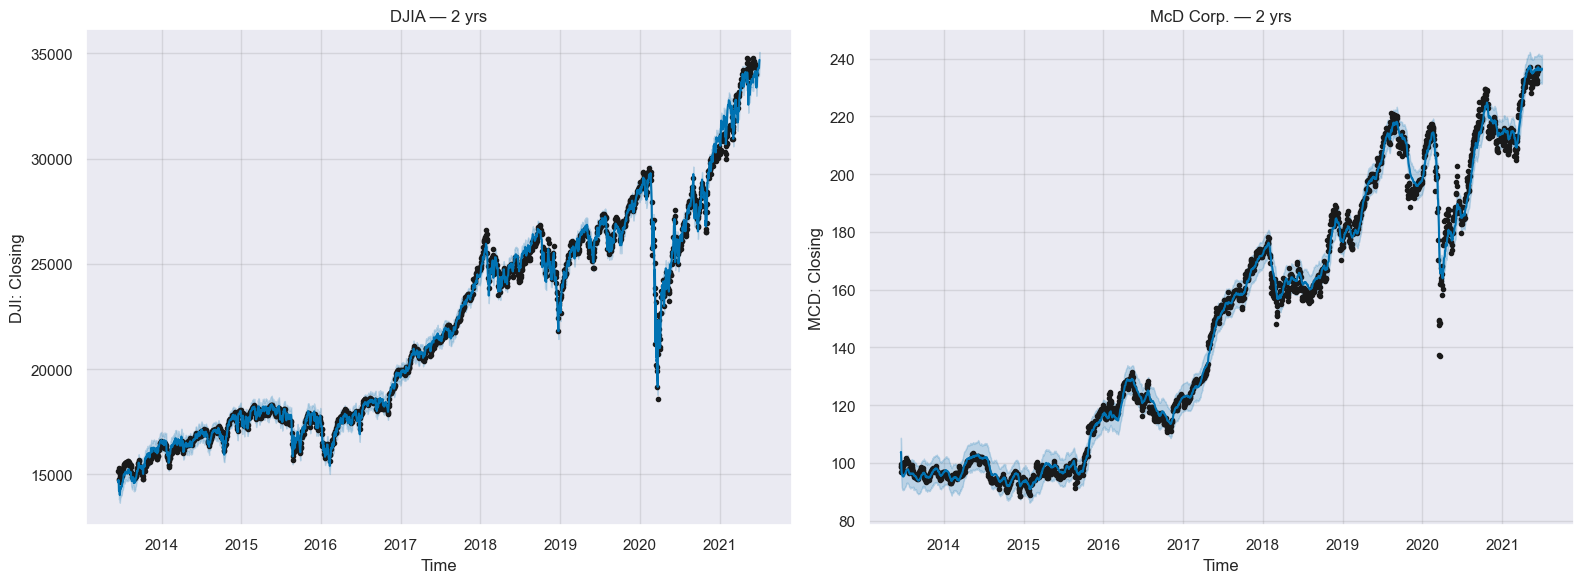

In [55]:
# Plot the predictions
fig, axes = plt.subplots(1, 2, figsize=(8*2, 6))  # Adjust the figure size as needed

# Plot the prediction for each DataFrame
model_multivariate_1.plot(forecast_multivariate_1, ax=axes[0])
axes[0].set_ylabel('DJI: Closing')
axes[0].set_xlabel('Time')
axes[0].set_title('DJIA — 2 yrs');

model_multivariate_2.plot(forecast_multivariate_2, ax=axes[1])
axes[1].set_ylabel('MCD: Closing')
axes[1].set_title('McD Corp. — 2 yrs');
axes[1].set_xlabel('Time')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

**Obs:**
- Compared to the univariate model (model w/o regressor), we can see that the current multivariate model (with the VTI regressor) has the predictions more aligned with the actual values.

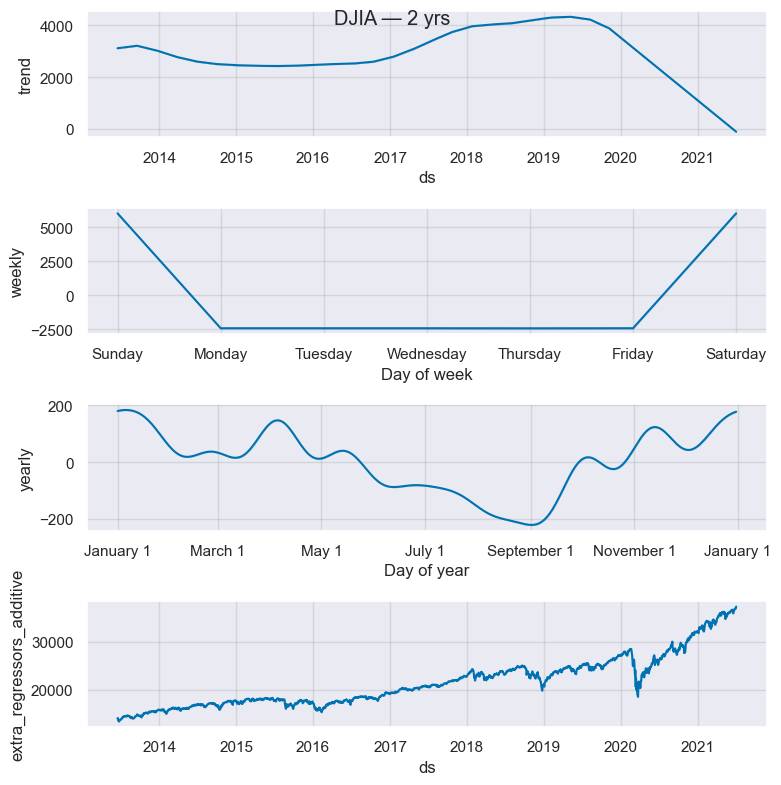

In [56]:
# Visualize the forecast components
fig = model_multivariate_1.plot_components(forecast_multivariate_1, figsize=(8, 8));
plt.suptitle('DJIA — 2 yrs');

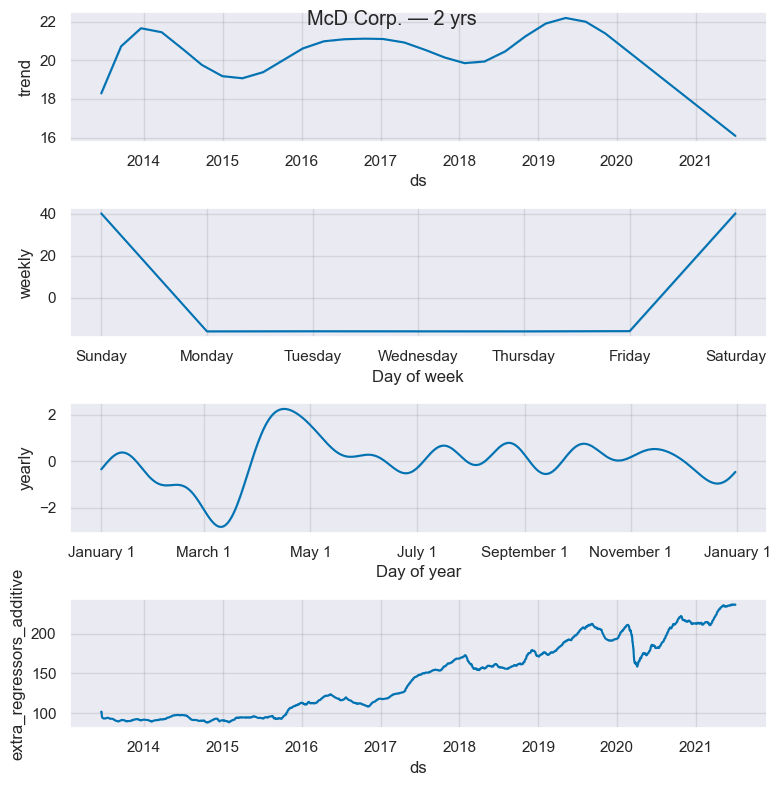

In [57]:
# Visualize the forecast components
fig = model_multivariate_2.plot_components(forecast_multivariate_2, figsize=(8, 8));
plt.suptitle('McD Corp. — 2 yrs');

**Note:**
The *components plot* has one additional chart for the *regressor*.

### 3.3 PERFORMANCE (Multivariate Model)

Note:
- The downloaded dataset is in the pandas df format.
- The output has 2-level column names.
- Using `droplevel`, the 1st level column name (`Close`) can be dropped.

In [58]:
# Merge actual and predicted values
performance_multivariate_1 = pd.merge(test_DJI, forecast_multivariate_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-periods:],on='ds')

# check MAE value
performance_multivariate_1_MAE = mean_absolute_error(performance_multivariate_1['y'], performance_multivariate_1['yhat'])
print(f'The MAE for the DJIA multivariate model is USD {round(performance_multivariate_1_MAE)}')

# Check MAPE value
performance_multivariate_1_MAPE = mean_absolute_percentage_error(performance_multivariate_1['y'], performance_multivariate_1['yhat'])
print(f'The MAPE for the DJIA multivariate model is {round(performance_multivariate_1_MAPE,3)}')

The MAE for the DJIA multivariate model is USD 87
The MAPE for the DJIA multivariate model is 0.003


**Obs: DJIA** The multivariate model performance is much better than the previous univariate seasonality model (w/o the regressors)...   
- The MAE (Mean Abs Error) for the multivariate model decreased to USD 87 (compared to the seasonality model USD 1,929).
- The MAPE (Mean Abs Percent Error) for the multivariate model also decreased to 0.3% (compared to the seasonality model 5.6%).

In [59]:
# Merge actual and predicted values
performance_multivariate_2 = pd.merge(test_MCD, forecast_multivariate_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-periods:],on='ds')

# check MAE value
performance_multivariate_2_MAE = mean_absolute_error(performance_multivariate_2['y'], performance_multivariate_2['yhat'])
print(f'The MAE for the MCD multivariate model is USD {round(performance_multivariate_2_MAE)}')

# Check MAPE value
performance_multivariate_2_MAPE = mean_absolute_percentage_error(performance_multivariate_2['y'], performance_multivariate_2['yhat'])
print(f'The MAPE for the MCD multivariate model is {round(performance_multivariate_2_MAPE,3)}')

The MAE for the MCD multivariate model is USD 4
The MAPE for the MCD multivariate model is 0.017


**Obs: MCD** The multivariate model performance is much better than the previous univariate seasonality model (w/o the regressors)... 
- The MAE (Mean Abs Error) for the multivariate model decreased to USD 4 (compared to the seasonality model USD 7).
- The MAPE (Mean Abs Percent Error) for the multivariate model also decreased to 1.7% (compared to the seasonality model 2.8%).

## 4. Model with Holiday Effect and Event Effect

- Besides seasonalities and additional predictors, we can also incorporate holidays and special events in a prophet time-series model.
- Here, we will add special events and US holidays to the multivariate model and see how it impacts the model predictions.

### 4.1 Fitting (Holidays/Events Model)

## Firstly, let's create a special event: COVID start and Russian-Ukrain WAR start.
- For the COVID start event, we set the date to be March 15th 2020, then extend the event to 15 days before and 15 days after using `lower_window` and `upper_window`, separately.
- For the WAR start event, we set the date to be , then extend the event to 20 days before and 20 days after using `lower_window` and `upper_window`, separately.
- Then the 2 events are concatenated together to one df called `events`.

In [60]:
# COVID time window
COVID = pd.DataFrame({ 'holiday': 'COVID',
                       'ds': pd.to_datetime(['2020-03-15']),
                       'lower_window': -15,
                       'upper_window':  15 })
WAR   = pd.DataFrame({ 'holiday': 'WAR',
                       'ds': pd.to_datetime(['2021-02-24']),
                       'lower_window': -20,
                       'upper_window':  20 })

# Combine all events
events = pd.concat((COVID, WAR))

# Take a look at the events data
events

,holiday,ds,lower_window,upper_window
0,COVID,2020-03-15,-15,15
0,WAR,2021-02-24,-20,20


**Notes:**  
- When initiating the Prophet model, the df name `events` is passed to the hyper-parameter `holidays`.
- Prophet has built-in contry-specific holidays. We add US holidays to the model using `add_country_holidays` and setting `country_name`='US'.
- Using `.train_holiday_names`, we can see the list of holidays and events used for the model fitting.

In [61]:
# Add holidays
model_holiday_1 = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)

# Add built-in country-specific holidays
model_holiday_1.add_country_holidays(country_name='US')

# Add regressor
model_holiday_1.add_regressor('Close VTI', standardize=False)
# model_holiday_1.add_regressor('EMA DJI', standardize=False)
# model_holiday_1.add_regressor('VWAP DJI', standardize=False)

# Fit the model on the training dataset
model_holiday_1.fit(train_DJI)

# All the holidays and events
model_holiday_1.train_holiday_names

01:35:25 - cmdstanpy - INFO - Chain [1] start processing
01:35:28 - cmdstanpy - INFO - Chain [1] done processing


0                                               COVID
1                                                 WAR
2                                      New Year's Day
3                          Martin Luther King Jr. Day
4                               Washington's Birthday
5                                        Memorial Day
6                                    Independence Day
7                                           Labor Day
8                                        Columbus Day
9                                        Veterans Day
10                                       Thanksgiving
11                                      Christmas Day
12                           Christmas Day (Observed)
13                          New Year's Day (Observed)
14                            Veterans Day (Observed)
15                        Independence Day (Observed)
16               Juneteenth National Independence Day
17    Juneteenth National Independence Day (Observed)
dtype: object

In [62]:
# Add holidays
model_holiday_2 = Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)

# Add built-in country-specific holidays
model_holiday_2.add_country_holidays(country_name='US')

# Add regressor
model_holiday_2.add_regressor('Close VTI', standardize=False)
model_holiday_2.add_regressor('EMA MCD', standardize=False)
model_holiday_2.add_regressor('VWAP MCD', standardize=False)

# Fit the model on the training dataset
model_holiday_2.fit(train_MCD)

# All the holidays and events
model_holiday_2.train_holiday_names;

01:35:29 - cmdstanpy - INFO - Chain [1] start processing
01:35:32 - cmdstanpy - INFO - Chain [1] done processing


### 4.2 Forecasting (Holidays/Events Model)

In [63]:
# Create the time range for the forecast
future_holiday_1 = model_holiday_1.make_future_dataframe(periods=periods)

# Append the regressor values
future_holiday_1 = pd.merge(future_holiday_1, dataDJI[['ds', 'Close VTI']], on='ds', how='inner')

# Fill the missing values with the previous value
future_holiday_1 = future_holiday_1.fillna(method='ffill')

In [64]:
# Create the time range for the forecast
future_holiday_2 = model_holiday_2.make_future_dataframe(periods=periods)

# Append the regressor values
future_holiday_2 = pd.merge(future_holiday_2, dataMCD[['ds', 'Close VTI','EMA MCD','VWAP MCD']], on='ds', how='inner')

# Fill the missing values with the previous value
future_holiday_2 = future_holiday_2.fillna(method='ffill')

In [65]:
# Make prediction
# forecast_holiday = model_holiday.predict(future_multivariate)
forecast_holiday_1 = model_holiday_1.predict(future_holiday_1)
forecast_holiday_2 = model_holiday_2.predict(future_holiday_2)

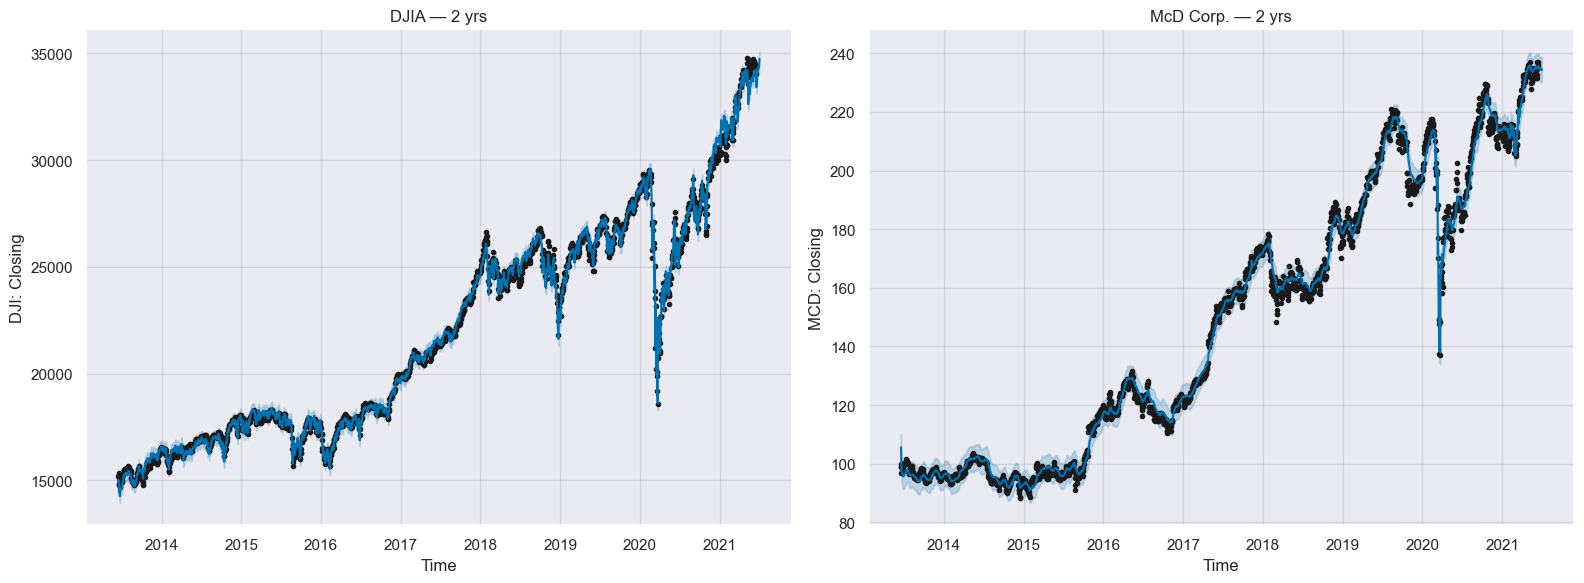

In [66]:
# Plot the predictions
fig, axes = plt.subplots(1, 2, figsize=(8*2, 6))  # Adjust the figure size as needed

# Plot the prediction for each DataFrame
model_holiday_1.plot(forecast_holiday_1, ax=axes[0])
axes[0].set_ylabel('DJI: Closing')
axes[0].set_xlabel('Time')
axes[0].set_title('DJIA — 2 yrs');

model_holiday_2.plot(forecast_holiday_2, ax=axes[1])
axes[1].set_ylabel('MCD: Closing')
axes[1].set_title('McD Corp. — 2 yrs');
axes[1].set_xlabel('Time')

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

**Note:** The *components plot* has one additional plot for the *holidays*, including *special events*.

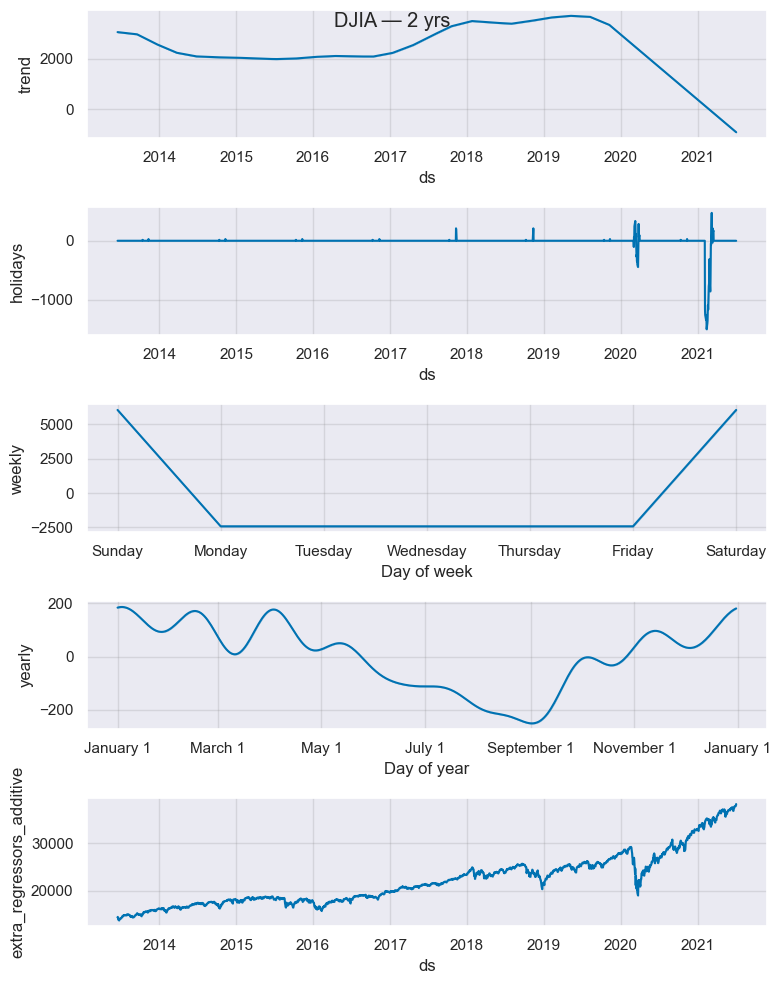

In [67]:
# Visualize the forecast components
fig = model_holiday_1.plot_components(forecast_holiday_1, figsize=(8, 10));
plt.suptitle('DJIA — 2 yrs');

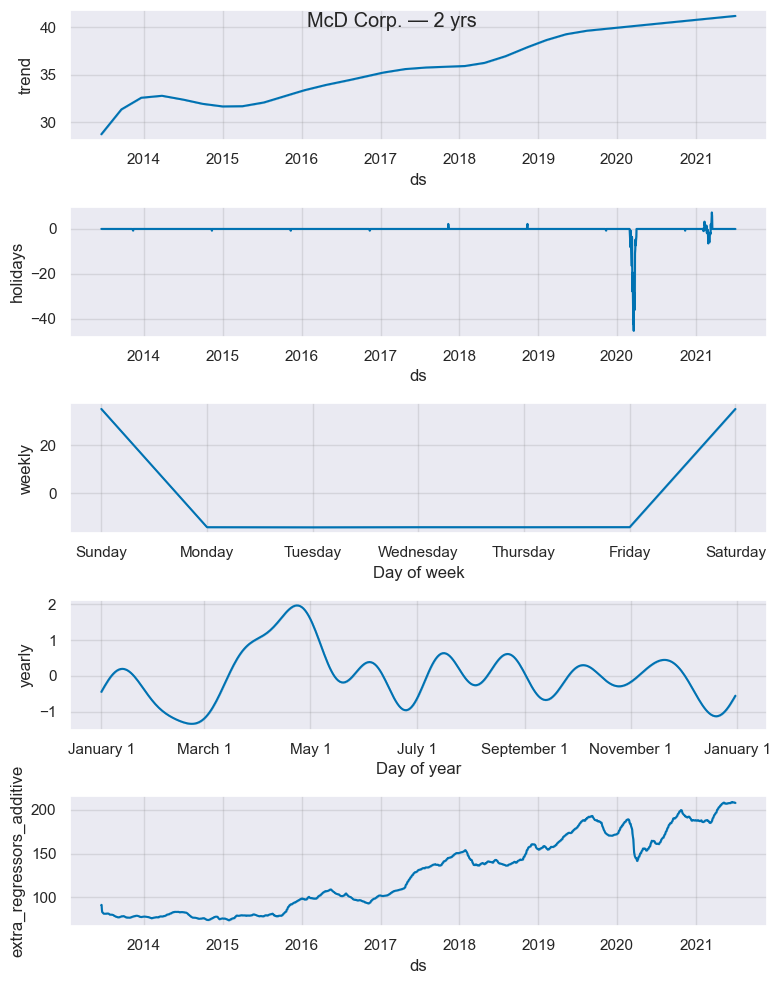

In [68]:
# Visualize the forecast components
fig = model_holiday_2.plot_components(forecast_holiday_2, figsize=(8, 10));
plt.suptitle('McD Corp. — 2 yrs');

### 4.3 PERFORMANCE (Holidays/Events Model)

In [69]:
# Merge actual and predicted values
performance_holiday_1 = pd.merge(test_DJI, forecast_holiday_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-periods:],on='ds')

# check MAE value
performance_holiday_1_MAE = mean_absolute_error(performance_holiday_1['y'], performance_holiday_1['yhat'])
print(f'The MAE for the DJIA holiday model is USD {round(performance_holiday_1_MAE)}')

# Check MAPE value
performance_holiday_1_MAPE = mean_absolute_percentage_error(performance_holiday_1['y'], performance_holiday_1['yhat'])
print(f'The MAPE for the DJIA holiday model is {round(performance_holiday_1_MAPE,3)}')

The MAE for the DJIA holiday model is USD 89
The MAPE for the DJIA holiday model is 0.003


**Obs: DJIA** The holiday/events model performance is much better than the previous multivariate seasonality model (w/o the regressors)... 
- The MAE (Mean Abs Error) for the holiday/events model remains unchanged at USD 89 (compared to the multivariate model USD 87).
- The MAPE (Mean Abs Percent Error) for the holiday/events model remains statble at 0.3%.

In [70]:
# Merge actual and predicted values
performance_holiday_2 = pd.merge(test_MCD, forecast_holiday_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-periods:],on='ds')

# check MAE value
performance_holiday_2_MAE = mean_absolute_error(performance_holiday_2['y'], performance_holiday_2['yhat'])
print(f'The MAE for the MCD holiday model is USD {round(performance_holiday_2_MAE)}')

# Check MAPE value
performance_holiday_2_MAPE = mean_absolute_percentage_error(performance_holiday_2['y'], performance_holiday_2['yhat'])
print(f'The MAPE for the MCD holiday model is {round(performance_holiday_2_MAPE,3)}')

The MAE for the MCD holiday model is USD 2
The MAPE for the MCD holiday model is 0.01


**Obs: MCD** The holiday/events model performance is much better than the previous multivariate seasonality model (w/o the regressors)... 
- The MAE (Mean Abs Error) for the holiday/events model decreased to USD 2 (compared to the seasonality model USD 4).
- The MAPE (Mean Abs Percent Error) for the holiday/events model also decreased to 1.0% (compared to the seasonality model 1.7%).